# Classic K-means O(no._of_pts x k x dimensiosn x iterations)
Initialization: We begin by randomly selecting k cluster centroids.

Assignment Step: Each data point is assigned to the nearest centroid, forming clusters.

Update Step: After the assignment, we recalculate the centroid of each cluster by averaging the points within it.

Repeat: This process repeats until the centroids no longer change or the maximum number of iterations is reached.

In [ ]:
def Euclid_distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [ ]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k): # calculates distance list for k clusters
            dis = Euclid_distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist) # returns index of min. value in this cluster index whose centroid is closer than others
        clusters[curr_cluster]['points'].append(curr_x) # add that point in that cluster
    return clusters

def update_clusters(X, clusters):
    for i in range(k): # create array of points again for each cluster to calculate mean
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

In [ ]:
def pred_cluster(X, clusters): # now predict
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(Euclid_distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

def compute_wcss(X, clusters):
    wcss = 0.0
    for k in range(len(clusters)):
        cluster_points = clusters[k]['points']
        center = clusters[k]['center']
        distances = np.linalg.norm(cluster_points - center, axis=1)
        wcss += np.sum(distances ** 2)
    return wcss

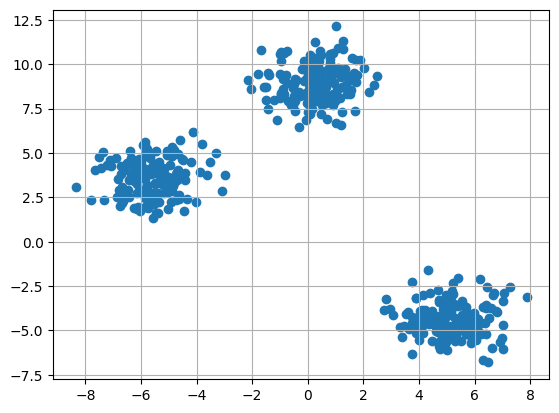

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23) # X is point and y is ground label
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
k = 3

clusters = {}
np.random.seed(98) # try with 95 etc etc

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.92906899, 0.26875606]), 'points': []},
 1: {'center': array([-0.79510444,  1.1223317 ]), 'points': []},
 2: {'center': array([-0.00850289, -1.52435925]), 'points': []}}

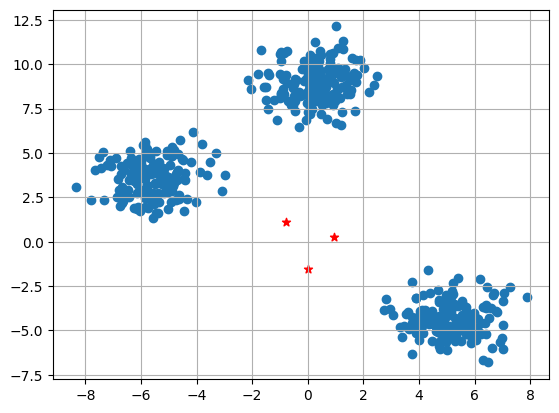

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [ ]:
clusters = assign_clusters(X,clusters)
print(clusters)
print(compute_wcss(X,clusters))
clusters = update_clusters(X,clusters)
clusters = assign_clusters(X,clusters)
print(clusters)
print(compute_wcss(X,clusters))
clusters = update_clusters(X,clusters)
clusters = assign_clusters(X,clusters)
print(clusters)
print(compute_wcss(X,clusters))
clusters = update_clusters(X,clusters)
clusters = assign_clusters(X,clusters)
print(clusters)
print(compute_wcss(X,clusters))
clusters = update_clusters(X,clusters)
clusters = assign_clusters(X,clusters)
print(clusters)
print(compute_wcss(X,clusters))
clusters = update_clusters(X,clusters)
clusters = assign_clusters(X,clusters)
print(clusters)
print(compute_wcss(X,clusters))
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

{0: {'center': array([0.92906899, 0.26875606]), 'points': [array([ 6.42385686, -3.54076191]), array([ 5.19947795, -2.78323398]), array([ 6.5721637 , -3.72520374]), array([ 5.41814352, -2.06334414]), array([ 6.66925828, -3.0074583 ]), array([ 5.22069058, -2.92058328]), array([ 7.25872544, -2.55308879]), array([ 6.71200876, -2.90064632]), array([ 4.3152296 , -1.57075913]), array([ 6.43868351, -2.53640779]), array([ 5.20931051, -2.34646051]), array([ 7.8721529 , -3.11853506]), array([ 3.74760042, -2.25994485]), array([ 4.69455246, -2.70097991]), array([ 7.01447424, -3.33960909]), array([ 6.7793098 , -3.87948078]), array([ 6.18348182, -2.10929335]), array([ 7.06235516, -2.88317682]), array([ 6.30467165, -3.67848664])]}, 1: {'center': array([-0.79510444,  1.1223317 ]), 'points': [array([-4.96938657,  3.53724005]), array([-4.81246011,  5.14500747]), array([-5.02457784,  3.16461048]), array([-6.62888728,  2.31853249]), array([-6.68706136,  3.09425861]), array([-0.7394091 , 10.76263031]), arra

The above initialization shows that, wcss will always converge to its minimum value, sometimes it just stops as you can see below

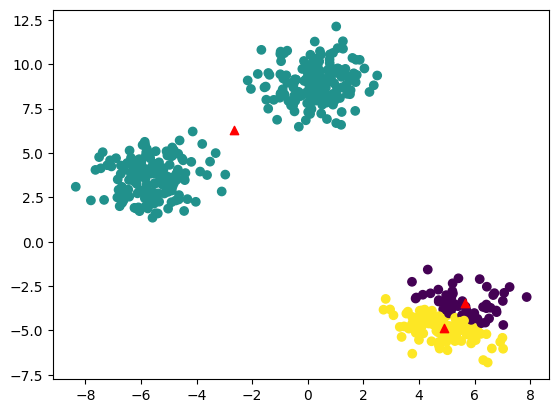

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

Let's try in built K means function to see a broader aspect

Initialization complete
Iteration 0, inertia 10525.853149965451.
Iteration 1, inertia 6117.080350169128.
Iteration 2, inertia 6110.201630350816.
Iteration 3, inertia 6106.816632696314.
Iteration 4, inertia 6104.547400290402.
Iteration 5, inertia 6103.958120746099.
Iteration 6, inertia 6102.700603683045.
Iteration 7, inertia 6099.630918211675.
Iteration 8, inertia 6096.984890852099.
Iteration 9, inertia 6093.202383714346.
Converged at iteration 9: center shift 0.0018411738505154094 within tolerance 0.0025690154306696493.
Initialization complete
Iteration 0, inertia 2187.327989140237.
Iteration 1, inertia 932.8452044497944.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2002.0177028771363.
Iteration 1, inertia 932.8452044497944.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 12904.560513212962.
Iteration 1, inertia 1632.10537260521.
Iteration 2, inertia 933.059152459013.
Converged at iteration 2: cent

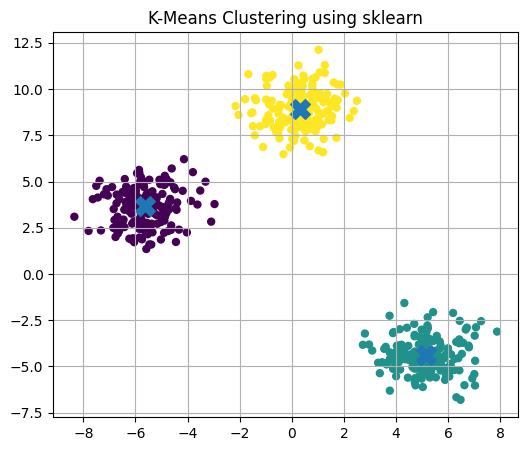

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'random',n_init = 'auto',random_state=3,verbose=1)
kmeans.fit(X)

# Predictions (cluster each point)
y_pred = kmeans.labels_

# Cluster centers
centers = kmeans.cluster_centers_

print(kmeans.init)
print("Iterations taken:", kmeans.n_iter_)
print("intializations",kmeans.n_init)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y_pred, s=25)
plt.scatter(centers[:,0], centers[:,1], s=200, marker='X')
plt.grid(True)
plt.title("K-Means Clustering using sklearn")
plt.show()

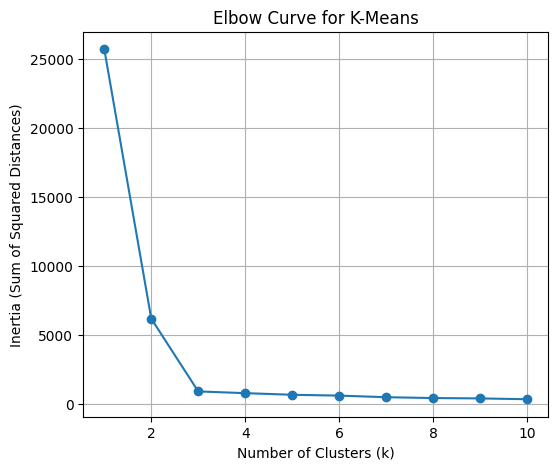

In [ ]:
# Elbow curve
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        init="random",
        n_init="auto",
        random_state=23
    )
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(6,5))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Curve for K-Means")
plt.grid(True)
plt.show()

# K-means++ O(n * d * k + i * n * k * d) ≈ O((i+1) * n * k * d)
## (i lesser than classic due to smart initialization)
K-Means++ is an improved version of the K-Means algorithm. Instead of picking all centroids randomly, it chooses the first center randomly and then selects the remaining centers in a spaced-out manner

1. First center: Choose the first cluster center uniformly at random from the data points

2. Subsequent centers: For each remaining center:
Calculate the distance from each data point to its nearest existing center.
Choose the next center with probability proportional to the square of this distance.
Points farther from existing centers have a higher chance of being selected.

The probability of selecting the next centroid is:

$$
P(x) = \frac{D(x)^2}{\sum_i D(i)^2}
$$

where \(D(x)\) is the distance of point \(x\) from the nearest already–chosen centroid.

The next centroid is chosen by sampling from this probability distribution.


3. Standard K-means: Once all k centers are initialized, proceed with the standard K-means algorithm
The squared distance weighting is important it ensures that points far from existing centers are much more likely to be chosen, naturally spreading the centers across the data space.

Initialization complete
Iteration 0, inertia 1138.6952263687467.
Iteration 1, inertia 932.8452044497944.
Converged at iteration 1: strict convergence.
k-means++
Iterations taken: 2
intializations auto


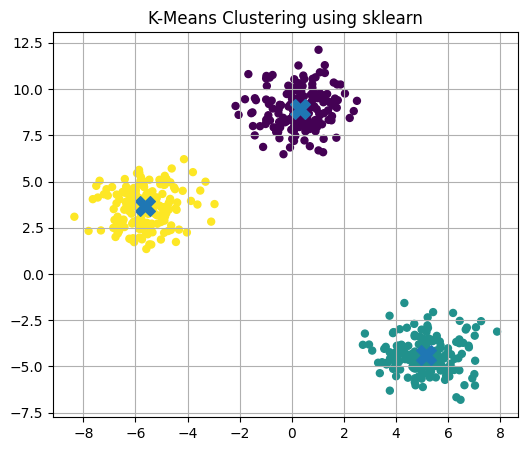

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++',n_init = 'auto',random_state=3,verbose=1)
kmeans.fit(X)

# Predictions (cluster each point)
y_pred = kmeans.labels_

# Cluster centers
centers = kmeans.cluster_centers_

print(kmeans.init)
print("Iterations taken:", kmeans.n_iter_)
print("intializations",kmeans.n_init)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y_pred, s=25)
plt.scatter(centers[:,0], centers[:,1], s=200, marker='X')
plt.grid(True)
plt.title("K-Means Clustering using sklearn")
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster._kmeans import _kmeans_plusplus
from sklearn.utils import check_random_state

# Required values
n_clusters = 3
x_squared_norms = np.sum(X ** 2, axis=1)
sample_weight = np.ones(X.shape[0], dtype=float)

# Correct random state
random_state = check_random_state(42)

# Call private k-means++ initializer
init_centers, indices = _kmeans_plusplus(
    X=X,
    n_clusters=n_clusters,
    x_squared_norms=x_squared_norms,
    sample_weight=sample_weight,
    random_state=random_state,
    n_local_trials=None
)

print("Initial centers:")
print(init_centers)

print("\nChosen point indices:")
print(indices)


Initial centers:
[[ 0.76658034  9.35087172]
 [ 4.62552687 -4.31818777]
 [-6.08283166  4.44970935]]

Chosen point indices:
[187 301  16]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

In [2]:
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='Data Points')
    if centroids.shape[0] > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='Selected Centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='Next Centroid')
    plt.title(f'Select {centroids.shape[0]}th Centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [3]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

In [6]:
import sys

def initialize(data, k):
    centroids = []
    centroids.append(data[np.random.randint(data.shape[0])])
    plot(data, np.array(centroids))

    for _ in range(k - 1):
        distances = []
        for point in data:
            min_dist = min([distance(point, c) for c in centroids])
            distances.append(min_dist)

        distances = np.array(distances)
        probs = distances**2 / np.sum(distances**2)
        next_centroid = data[np.random.choice(len(data), p=probs)]
        centroids.append(next_centroid)
        plot(data, np.array(centroids))

    return np.array(centroids)

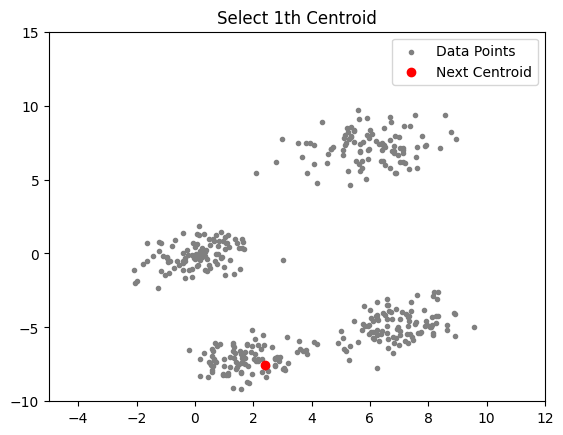

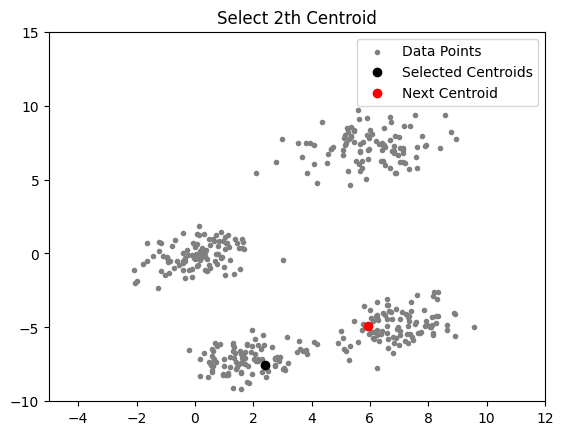

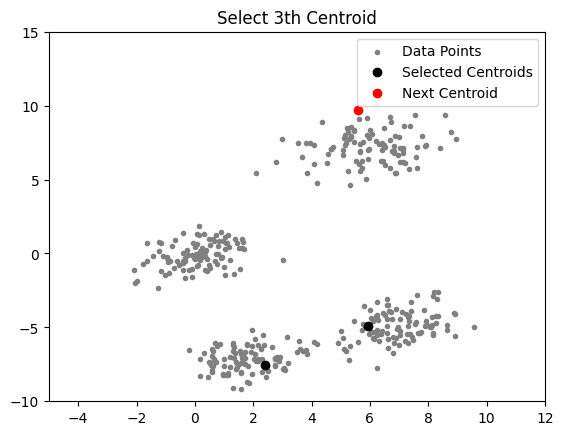

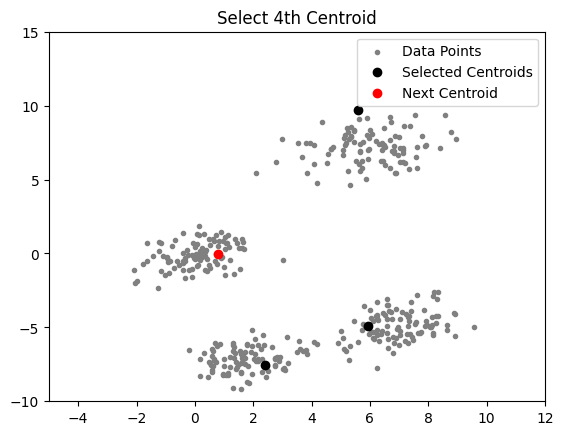

In [10]:
# Run initialization
centroids = initialize(data, k=4)

# Problems
K-means fails with non-spherical shapes (elliptical, complex), varying densities/sizes, or noisy data (outliers) because it assumes spherical clusters & equal variance and performance degrades in high dimensions (curse of dimensionality)